In [ ]:
## Download dataset: https://huggingface.co/datasets/nvidia/PhysicalAI-Spatial-Intelligence-Warehouse
# from huggingface_hub import snapshot_download

# snapshot_download(
#     repo_id = "nvidia/PhysicalAI-Spatial-Intelligence-Warehouse",
#     repo_type = "dataset",
#     local_dir = "../data/PhysicalAI-Spatial-Intelligence-Warehouse"
# )

## Download and unzip dataset

In [ ]:
%%bash
# You can also use `huggingface-cli download`
# git clone https://huggingface.co/datasets/nvidia/PhysicalAI-Spatial-Intelligence-Warehouse
# cd PhysicalAI-Spatial-Intelligence-Warehouse

# # we need to untar images for train/test subsets
# for dir in train test; do
#     for subdir in images depths; do
#         if [ -d "$dir/$subdir" ]; then
#             echo "Processing $dir/$subdir"
#             cd "$dir/$subdir"
#             tar -xzf chunk_*.tar.gz
#             # rm chunk_*.tar.gz
#             cd ../..
#         fi
#     done
# done

## Visualize

In [1]:
!pwd

/Users/dangminh/Desktop/aicity2025_track3_warehouse_spatial_intelligence/notebooks


In [2]:
%cd ../data/PhysicalAI-Spatial-Intelligence-Warehouse

/Users/dangminh/Desktop/aicity2025_track3_warehouse_spatial_intelligence/data/PhysicalAI-Spatial-Intelligence-Warehouse


In [3]:
# %%shell
# take 10 first sample, add mask and depth, then save to "visualization" folder
!python ./utils/visualize.py \
    --image_folder ./val/images/ \
    --depth_folder ./val/depths/ \
    --annotations_file ./val.json \
    --num_samples 10


100%|███████████████████████████████████████████| 10/10 [00:03<00:00,  3.15it/s]


In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import json

def visualize_sample(sample, image_path, rgb_path=None, depth_path=None):
    print(f"id: {sample['id']}")
    print(f"image: {sample['image']}")
    print(f"conversations:\n{sample['conversations']}")
    print(f"rle: {len(sample['rle'])} of masks")
    print(f"category: {sample['category']}")
    print(f"normalized_answer: {sample['normalized_answer']}")
    print(f"freeform_answer: {sample['freeform_answer']}")
    print(f"-"*100)
    
    image = Image.open(image_path)
    plt.figure(figsize=(20, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print("="*100)

In [7]:
# load val dataset
with open(f"val.json", "r") as f:
    data = json.load(f)

In [8]:
sample = data[0]
sample

{'id': 'aff5479b81c95b0194f58dbaaa041332',
 'image': '000315.png',
 'conversations': [{'from': 'human',
   'value': 'From this viewpoint, does the pallet <mask> appear on the right-hand side of the pallet <mask>?'},
  {'from': 'gpt',
   'value': 'The pallet [Region 0] is to the left of the pallet [Region 1].'}],
 'rle': [{'size': [1080, 1920],
   'counts': 'bngl081MYQ19010ON2jMDmROa0ol01_RO2^m0`0PRODkm0o0bQOUO[n0U2N2M3N2N2N3L3N2N1N1WO_L]SOa3el0_LYSOb3il0]LTSOf3ll0ZLRSOh3nl0XLPSOj3Pm0VLmROn3Rm0SLkROo3Um0QLiROQ4Wm081O00N3L3N2O10000010O0000000001O01O00000001O10O01O003M2N0010O0000000001O01O00000M3N201N1001O00000001O01O000001O0001O000000000010O00000000010O0002N00001O3N1N000000000001O000000000O2M200O1M3N20001CQSOoKol0n3TSORLll0k3WSOVLhl0g3[SOYLel0f3\\SOZLdl0c3_SO]Lal0Z2nROcNe0RO^l0\\1kSO_OJUOmn0g0WQOZOhn0a0]QO_Odn0=_QOCan0:bQOF^n08eQOG[n07gQOIYn04jQOMUn00nQO0d[nm0'},
  {'size': [1080, 1920],
   'counts': '^PmU1j1no000000000000000000001O0000000000001O0000000000001O0000000000001O0000000000001O

id: aff5479b81c95b0194f58dbaaa041332
image: 000315.png
conversations:
[{'from': 'human', 'value': 'From this viewpoint, does the pallet <mask> appear on the right-hand side of the pallet <mask>?'}, {'from': 'gpt', 'value': 'The pallet [Region 0] is to the left of the pallet [Region 1].'}]
rle: 2 of masks
category: left_right
normalized_answer: left
freeform_answer: The pallet [Region 0] is to the left of the pallet [Region 1].
----------------------------------------------------------------------------------------------------


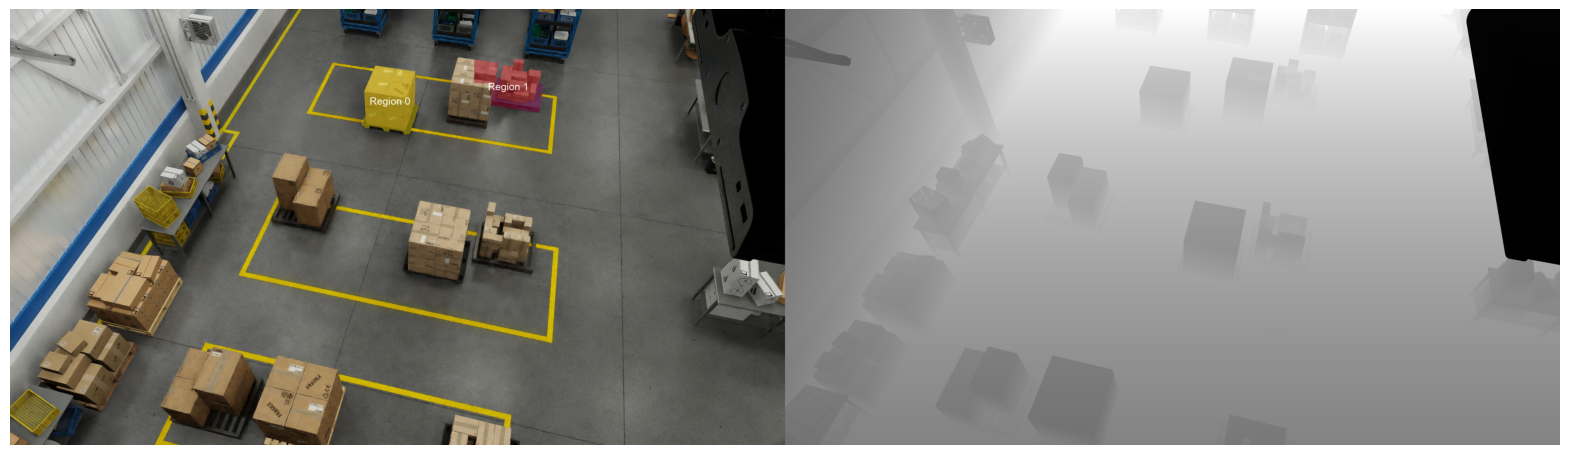

id: d05fc8c61137b99b02b70625b5eb0eae
image: 001505.png
conversations:
[{'from': 'human', 'value': '<image>\nUsing the buffer masks <mask> <mask> <mask> and pallet masks <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask>, how many pallets are situated in the buffer region closest to the shelf on the right among <mask> <mask>?'}, {'from': 'gpt', 'value': 'The shelf [Region 14] is the shelf on the right. The buffer region [Region 0] is the closest to the shelf [Region 14]. I see pallets [Region 5] [Region 9] [Region 12] in the buffer region [Region 0]. Hence, in buffer area [Region 0], there are exactly three pallets.'}]
rle: 15 of masks
category: count
normalized_answer: 3
freeform_answer: The shelf [Region 14] is the shelf on the right. The buffer region [Region 0] is the closest to the shelf [Region 14]. I see pallets [Region 5] [Region 9] [Region 12] in the buffer region [Region 0]. Hence, in buffer area [Region 0], there are exactly three pallets.
-----------------

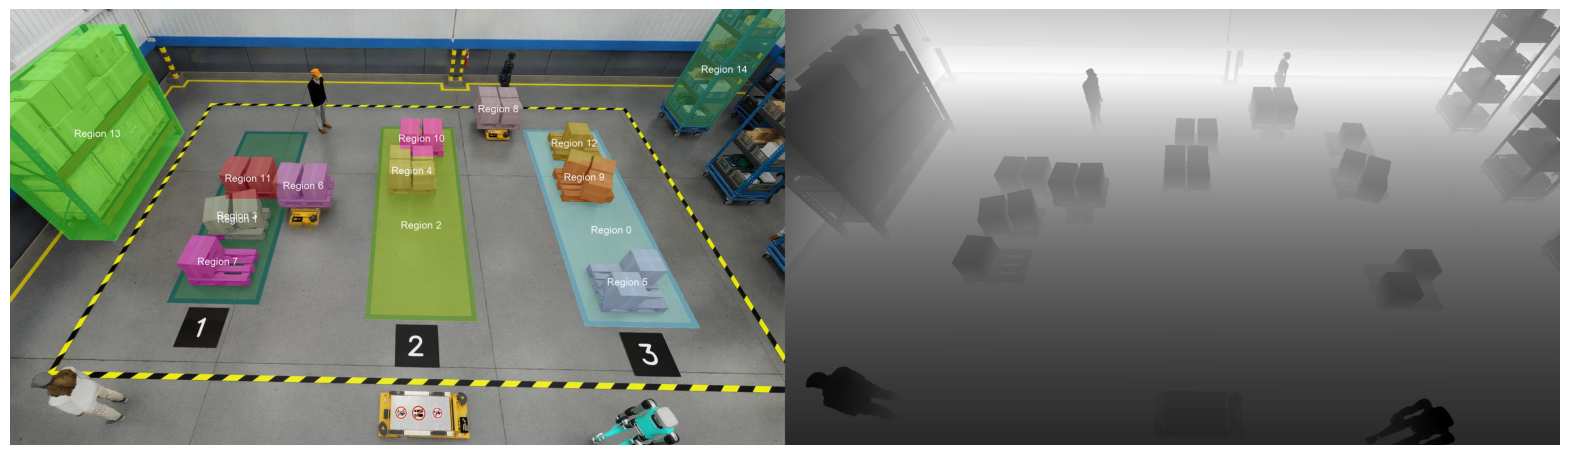

id: 343662060cf0598e66985d6160c93113
image: 000705.png
conversations:
[{'from': 'human', 'value': '<image>\nUsing the buffer masks <mask> <mask> <mask> and pallet masks <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask>, can you determine how many pallets are inside the leftmost buffer area?'}, {'from': 'gpt', 'value': "From the image's perspective, the buffer region [Region 2] is the leftmost buffer region. There are pallets [Region 5] [Region 10] inside the buffer region [Region 2]. Thus, the buffer region [Region 2] is storing two pallets at the moment."}]
rle: 11 of masks
category: count
normalized_answer: 2
freeform_answer: From the image's perspective, the buffer region [Region 2] is the leftmost buffer region. There are pallets [Region 5] [Region 10] inside the buffer region [Region 2]. Thus, the buffer region [Region 2] is storing two pallets at the moment.
----------------------------------------------------------------------------------------------------


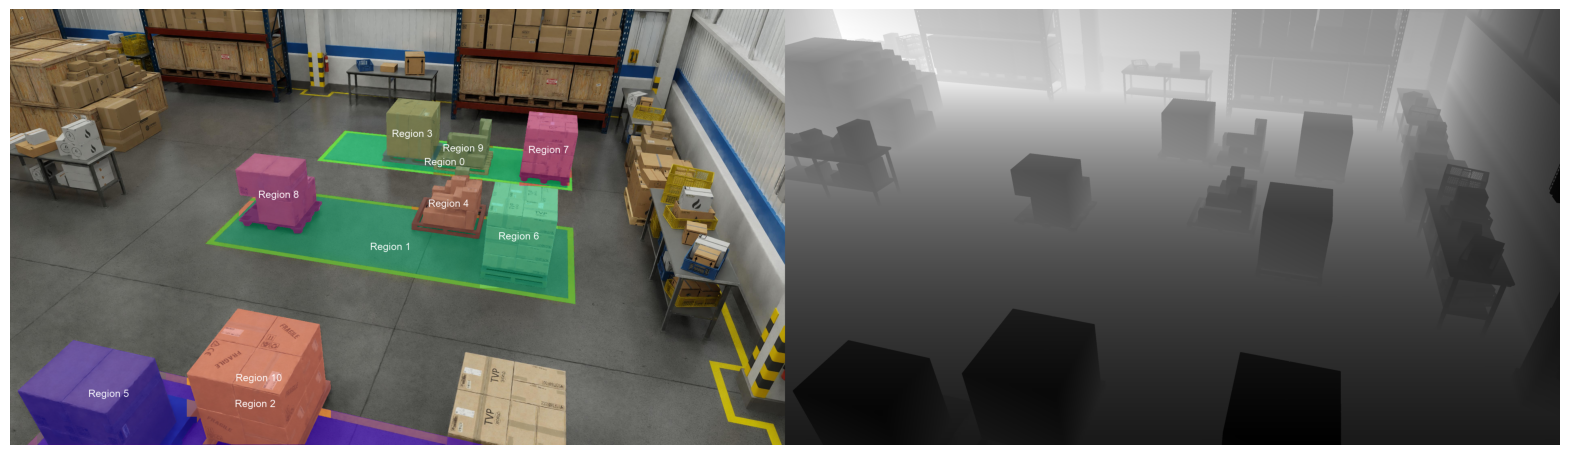

id: a47efce6e660965efb52ca6986259d7d
image: 001344.png
conversations:
[{'from': 'human', 'value': '<image>\nConsidering the pallets <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask> <mask> and the shelves <mask> <mask>, can you measure the distance between the leftmost pallet and the shelf on the right?'}, {'from': 'gpt', 'value': '[Region 9] is the leftmost pallet from this viewpoint, and the shelf [Region 11] is the shelf on the right. The spatial distance between the pallet [Region 9] and the shelf [Region 11] is 13.54 meters.'}]
rle: 12 of masks
category: distance
normalized_answer: 13.54
freeform_answer: [Region 9] is the leftmost pallet from this viewpoint, and the shelf [Region 11] is the shelf on the right. The spatial distance between the pallet [Region 9] and the shelf [Region 11] is 13.54 meters.
----------------------------------------------------------------------------------------------------


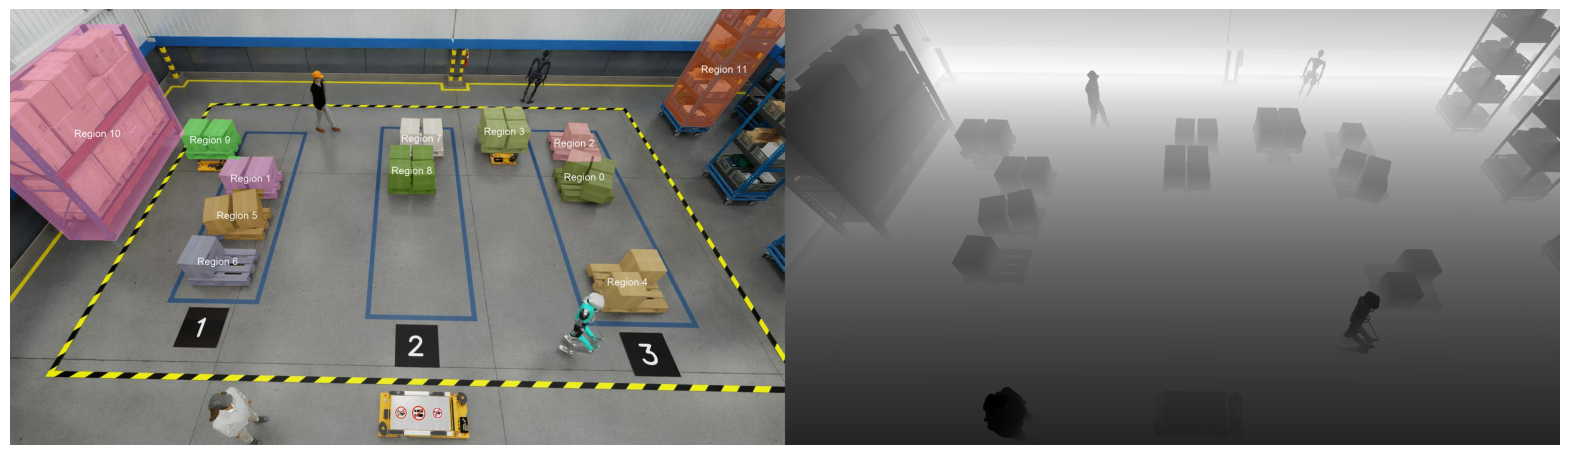

id: cb526bbab4836632b87da0f0fa92c610
image: 001021.png
conversations:
[{'from': 'human', 'value': 'From the current viewing position, which of the pallet <mask>, the pallet <mask>, and the pallet <mask> is the leftmost?'}, {'from': 'gpt', 'value': 'The pallet [Region 1] is the leftmost object from this viewpoint.'}]
rle: 3 of masks
category: mcq
normalized_answer: 1
freeform_answer: The pallet [Region 1] is the leftmost object from this viewpoint.
----------------------------------------------------------------------------------------------------


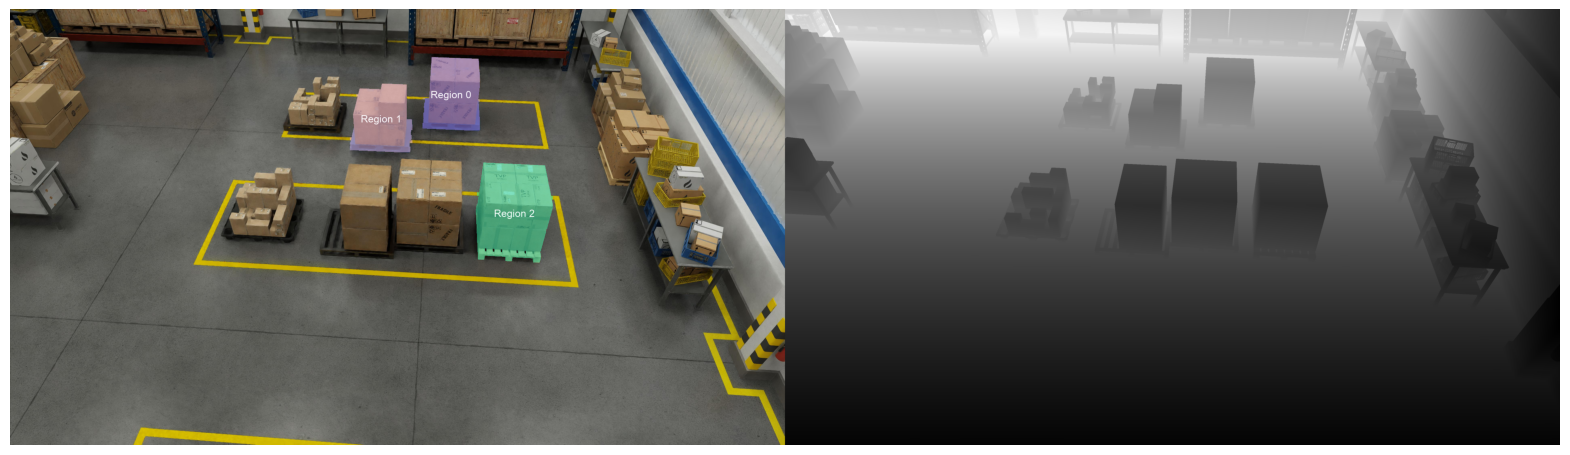

In [9]:
# take the first n sample, then visualize
n_sample = 5
samples = data[:n_sample]

for sample in samples:
    image_path = f"visualization/val.json_{sample['image']}"
    visualize_sample(sample, image_path)

## Test evaluation

In [12]:
%%bash
# sanity check with perfect answer
python ./utils/compute_scores.py \
    --gt_path ./val.json \
    --pred_path ./utils/assets/perfect_predictions_val.json



===== EVALUATION RESULTS =====

QUANTITATIVE RESULTS:
Count (500): 500/500 = 100.00%
  Abs Rel = 0.0
  Error Rate = 0.00%
Distance (486): 486/486 = 100.00%
  Abs Rel = 0.0
  Error Rate = 0.00%

QUALITATIVE RESULTS:
left_right (500): 500/500 = 100.00%
mcq (456): 456/456 = 100.00%

===== OVERALL SUMMARY =====
Count (weighted): 100.00% * 0.25 = 25.00
Distance (weighted): 100.00% * 0.25 = 25.00
left_right (weighted): 100.00% * 0.25 = 25.00
mcq (weighted): 100.00% * 0.25 = 25.00

Final Weighted Score: 100.00%
Quantitative: 986/986 = 100.00%
Qualitative: 956/956 = 100.00%
Overall: 1942/1942 = 100.00%

Saved summary results to: ./predictions/score_20250528_213247.json
Saved full results to: ./predictions/full_results_20250528_213247.json


In [10]:
%%bash
# sanity check with perfect answer
python ./utils/compute_scores.py \
    --gt_path ./val.json \
    --pred_path ./utils/assets/partial_predictions_val.json


===== EVALUATION RESULTS =====

QUANTITATIVE RESULTS:
Count (500): 235/500 = 47.00%
  Abs Rel = 0.276
  Error Rate = 27.65%
Distance (486): 242/486 = 49.79%
  Abs Rel = 411522.749
  Error Rate = 41152274.92%

QUALITATIVE RESULTS:
left_right (500): 260/500 = 52.00%
mcq (456): 215/456 = 47.15%

===== OVERALL SUMMARY =====
Count (weighted): 47.00% * 0.25 = 11.75
Distance (weighted): 49.79% * 0.25 = 12.45
left_right (weighted): 52.00% * 0.25 = 13.00
mcq (weighted): 47.15% * 0.25 = 11.79

Final Weighted Score: 48.99%
Quantitative: 477/986 = 48.38%
Qualitative: 475/956 = 49.69%
Overall: 952/1942 = 49.02%

Saved summary results to: ./predictions/score_20250528_213236.json
Saved full results to: ./predictions/full_results_20250528_213236.json


In [11]:
%%bash
# sanity check with perfect answer
python ./utils/compute_scores.py \
    --gt_path ./val.json \
    --pred_path ./utils/assets/random_predictions_val.json


===== EVALUATION RESULTS =====

QUANTITATIVE RESULTS:
Count (500): 60/500 = 12.00%
  Abs Rel = 1.56
  Error Rate = 156.02%
Distance (486): 46/486 = 9.47%
  Abs Rel = 65534980.757
  Error Rate = 6553498075.72%

QUALITATIVE RESULTS:
left_right (500): 271/500 = 54.20%
mcq (456): 37/456 = 8.11%

===== OVERALL SUMMARY =====
Count (weighted): 12.00% * 0.25 = 3.00
Distance (weighted): 9.47% * 0.25 = 2.37
left_right (weighted): 54.20% * 0.25 = 13.55
mcq (weighted): 8.11% * 0.25 = 2.03

Final Weighted Score: 20.94%
Quantitative: 106/986 = 10.75%
Qualitative: 308/956 = 32.22%
Overall: 414/1942 = 21.32%

Saved summary results to: ./predictions/score_20250528_213240.json
Saved full results to: ./predictions/full_results_20250528_213240.json
